# Devstutya Pandey

## **To what extent are the gun violence incidents classified as homicides affected by demographic factors ?**

### Sub questions:
1. What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with demographic factors (specifically age, race and sex)? This sub-question will have 3 parts and will be explored while keeping other factors such as education and location constant. The three parts will be:
    - What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?
    


2. How is the relation between homicides and demographics affected by differing education? For this sub question, we will be using the 'education column' to look into how the initially explored relation between homicides and demographics can vary with the education of the perpetrator. Will a less educated individual be more likely to be involved in a homicide? 




## Exploratory Data Analysis

#### Firstly, we have a look at the raw data given to us and better understand the variables 

In [2]:
from scripts import project_functions2 as pt2
pt2.import_lib()

In [3]:
df = pt2.load("../data/raw/full_data.csv")
df

,index,year,month,intent,sex,age,race,education
0,14,2012,3,Homicide,M,27.0,White,HS/GED
1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander,Some college
2,22,2012,4,Homicide,F,47.0,Black,HS/GED
3,24,2012,4,Homicide,M,51.0,White,HS/GED
4,25,2012,4,Homicide,M,41.0,White,HS/GED
...,...,...,...,...,...,...,...,...
35171,100793,2014,12,Homicide,M,36.0,Black,HS/GED
35172,100794,2014,12,Homicide,M,19.0,Black,HS/GED
35173,100795,2014,12,Homicide,M,20.0,Black,HS/GED
35174,100796,2014,12,Homicide,M,22.0,Hispanic,Less than HS


In [4]:
print(df.nunique(axis = 0))
df.describe()
#To better understand our dataset and its variables

index        35176
year             3
month           12
intent           1
sex              2
age            100
race             5
education        4
dtype: int64


,index,year,month,age
count,35176.000000,35176.000000,35176.000000,35167.000000
mean,49007.880202,2012.980555,6.687031,32.620212
std,29115.366145,0.817170,3.398012,13.971713
min,14.000000,2012.000000,1.000000,0.000000
25%,23218.500000,2012.000000,4.000000,22.000000
50%,48153.500000,2013.000000,7.000000,29.000000
75%,74503.000000,2014.000000,10.000000,40.000000
max,100797.000000,2014.000000,12.000000,107.000000


### Next, we will clean up the dataset and display the data which will be most relevant to the research question

Specifically we're going to remove the irrelavant data, like the 'hispanic', 'police', and the 'place' column. Additionally as we're only looking at the gun violence incidents that classify as homicides, we will be modifying the dataset accordingly.

In [4]:
df

,index,year,month,intent,sex,age,race,education
0,14,2012,3,Homicide,M,27.0,White,HS/GED
1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander,Some college
2,22,2012,4,Homicide,F,47.0,Black,HS/GED
3,24,2012,4,Homicide,M,51.0,White,HS/GED
4,25,2012,4,Homicide,M,41.0,White,HS/GED
...,...,...,...,...,...,...,...,...
35171,100793,2014,12,Homicide,M,36.0,Black,HS/GED
35172,100794,2014,12,Homicide,M,19.0,Black,HS/GED
35173,100795,2014,12,Homicide,M,20.0,Black,HS/GED
35174,100796,2014,12,Homicide,M,22.0,Hispanic,Less than HS


Since the research question I am focusing on has 2 major sub-questions, the first sub-question will not require the 'education' column, whereas the second sub-question will (so df will be used for the second sub-question, ideally to create a facet plot for analysis). 
I will be using the following dataset (below) to explore the first sub-question of my research question.

In [5]:
df1= pt2.load1("../data/raw/full_data.csv")
df1

,index,year,month,intent,sex,age,race
0,14,2012,3,Homicide,M,27.0,White
1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander
2,22,2012,4,Homicide,F,47.0,Black
3,24,2012,4,Homicide,M,51.0,White
4,25,2012,4,Homicide,M,41.0,White
...,...,...,...,...,...,...,...
35171,100793,2014,12,Homicide,M,36.0,Black
35172,100794,2014,12,Homicide,M,19.0,Black
35173,100795,2014,12,Homicide,M,20.0,Black
35174,100796,2014,12,Homicide,M,22.0,Hispanic


Now let's also export the two required datasets (df) to a .csv file

In [6]:
df.to_csv('../data/processed/processed2.csv', index=False)

### Analysis using modified dataframes (Milestone 4)

##### First sub-question:

- What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with demographic factors (specifically age, race and sex)? This sub-question will have 3 parts and will be explored while keeping other factors such as education and location constant. The three parts will be:

     - What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?

Here we can see, that this sub-question is divided into 3 specific parts, and for each sub part I will be analysing a different demographic

1. The below visualisation will help us analyse the following question: 
- What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?

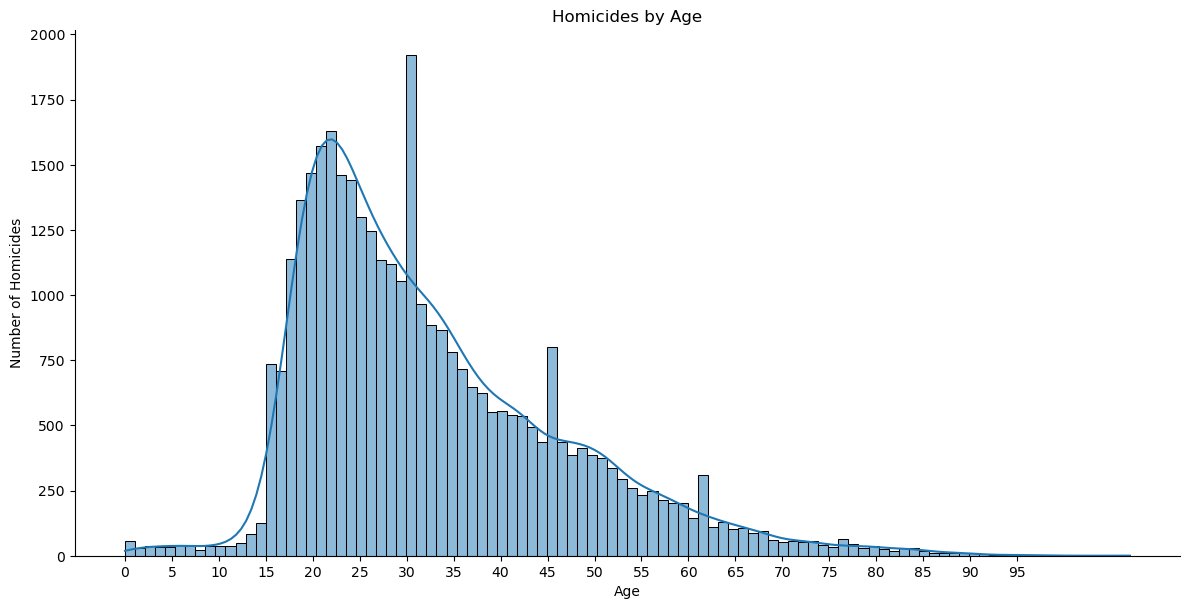

In [7]:
pt2.sns.displot(df1, x = 'age', bins=100, height = 6, aspect = 2, kde = True)
pt2.plt.title('Homicides by Age')
pt2.plt.xlabel('Age')
pt2.plt.ylabel('Number of Homicides')
pt2.plt.xticks(pt2.np.arange(0, 100, 5))
pt2.plt.show()


We can see a distinct pattern from the above plot, the highest number of homicides are being perpetrated by those between the ages of 20 and 40. The highest point being at the age of 31. The density curve also shows a peak of homicide incidents around the age of 20, and after this peak there is a gradual decrease as people get older. There are also a couple of anomalies which go beyond the density line, for example, there is a spike of homicide incidents that happen in the age of 45-46.


2. The below visualisation will help us analyse the next question: 
   - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?

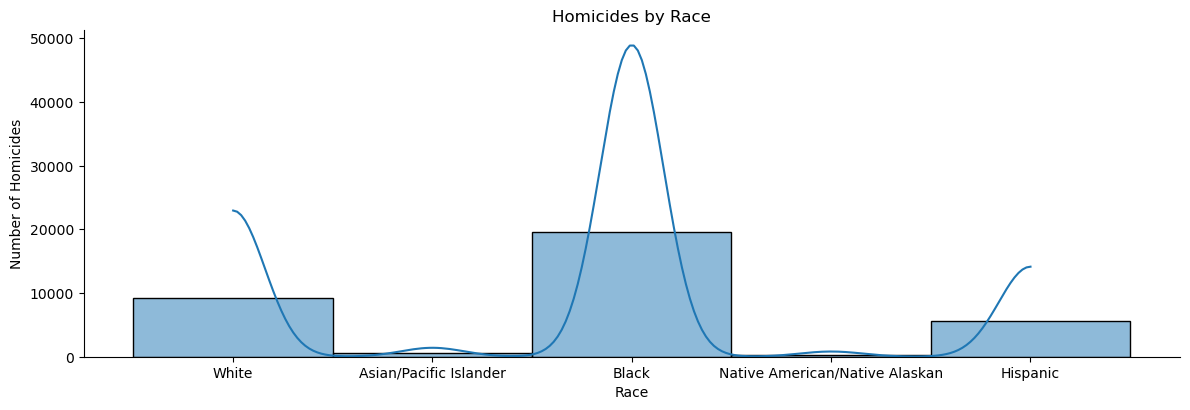

In [8]:
pt2.sns.displot(df1, x = 'race', binwidth= 10, height = 4, aspect = 3, kde = True)
pt2.plt.title('Homicides by Race')
pt2.plt.xlabel('Race')
pt2.plt.ylabel('Number of Homicides')
pt2.plt.show()

From the above graph we can see that the highest number of homicides are perpetrated by the Black race, and 'White' is following up in second. That is the only trend we can see from the above graph, for a more comprehensive analysis we will create more visualisations, using a various plots to see how race and sex/age affect the number of homicides.


3. The below visualisation will help us analyse the next question: 
   - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?

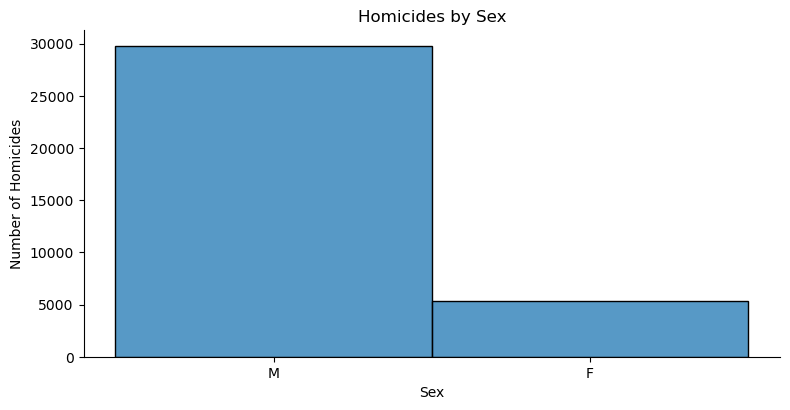

In [12]:
pt2.sns.displot(df1, x = 'sex', height = 4, aspect = 2)
pt2.plt.title('Homicides by Sex')
pt2.plt.xlabel('Sex')
pt2.plt.ylabel('Number of Homicides')
pt2.plt.show()

From the above graph, we can see that gun violence incidents classified as homicides occur significantly more when a male is involved, when compared to a female. This relationship will explored more when we analyze how all three demographic variables (age,sex, and race) affect the number of homicides simulataneously.

Further exploration of the first sub-question will be done in the second sub question, and it will involve more advanced visualisations which will help us analyse all three demographic variables (age,sex, and race) simulataneously.

#### Further Exploration

##### Second sub-question:

- How is the relation between homicides and demographics affected by differing education? For this sub question, we will be using the 'education column' to look into how the initially explored relation between homicides and demographics can vary with the education of the perpetrator. Will a less educated individual be more likely to be involved in a homicide?

For this sub-question, we will be using df as the main dataframe.

In [13]:
df

,index,year,month,intent,sex,age,race,education
0,14,2012,3,Homicide,M,27.0,White,HS/GED
1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander,Some college
2,22,2012,4,Homicide,F,47.0,Black,HS/GED
3,24,2012,4,Homicide,M,51.0,White,HS/GED
4,25,2012,4,Homicide,M,41.0,White,HS/GED
...,...,...,...,...,...,...,...,...
35171,100793,2014,12,Homicide,M,36.0,Black,HS/GED
35172,100794,2014,12,Homicide,M,19.0,Black,HS/GED
35173,100795,2014,12,Homicide,M,20.0,Black,HS/GED
35174,100796,2014,12,Homicide,M,22.0,Hispanic,Less than HS


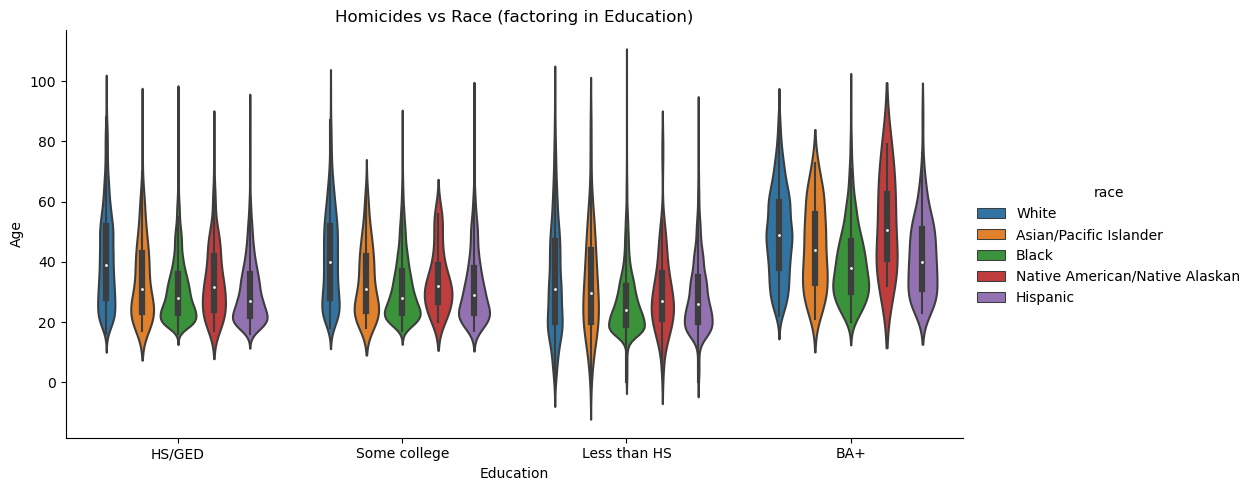

In [5]:
plot = pt2.sns.catplot(data=df, x='education', y='age',hue='race',col='intent',kind='violin', aspect= 2)
plot.set(title= "Homicides vs Race (factoring in Education)", xlabel = "Education", ylabel = "Age")

From this graph we can see even though, overall the black race had the highest number of homicides, when education is brought into the frame the numbers change drastically. When a person has education of HS/GED or college education, white people are generally more involved in homicides. However when observing more carefully, the black race has a higher density of homicides around the ages of 20, when compared to any other race.
Nonetheless, this shows that on average or in general the black race will not be as involved once education is taken into consideration, and education definitely influences the likelihood of being involved in homicides.

[Text(0.5, 1.0, 'Homicides vs Sex (factoring in Education)'),
 Text(0.5, 0, 'Education'),
 Text(0, 0.5, 'Age')]

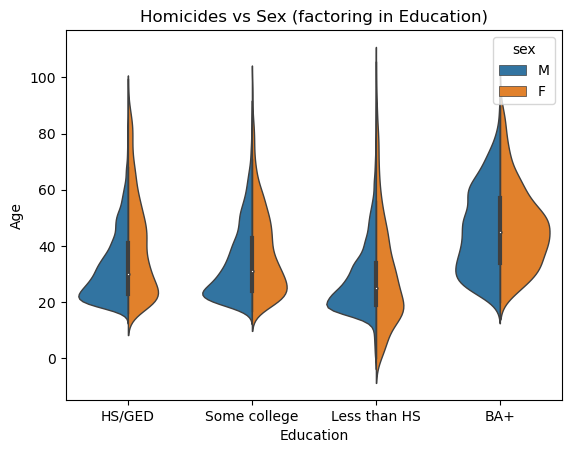

In [15]:

plot = pt2.sns.violinplot(data=df, x='education', y='age',hue='sex', split=True, inner="box", linewidth=1)
plot.set(title= "Homicides vs Sex (factoring in Education)", xlabel = "Education", ylabel = "Age")

Through this second graph we can see that when education is put into consideration, the male sex can in general be involved more in homicides if they are in the education categories -"HS/GED", "Less than HS" or "Some College". However, it does seem much closer in the categories of 'Less than high school' and 'Some college', hinting towards the fact that a lower level of education will directly corelate with a higher number of homicides(especially in the age range of 20-40)

### Analysis Results

Through our analysis, we came to various conclusions- a significant one being that a higher education relates to lower homicides. Also we established that when only the demographic factor of race is considered, the african american race was the most involved but when we put education into consideration, the numbers changed drastically signifying that education is perhaps a more significant contributor and can be a more reliable solution to the issue of gun violence. Actions like spreading more knowledge about incidents and spreading awareness will play a vital role in reducing homicides and gun violence in general. Additionally, throughout the analysis we have answered all of the sub-questions of my research question, and to sum up:
1. The chances of being involved in a homicide are the highest around the ages of 20-40, with a peak of around mid-20s.
2. The male sex is significantly more involved in gun violence than the female sex, which doesn't change significantly when education is taken into consideration, however, the lower the level of education, the higher the number of homicides(especially in the age range of 20-40)
3. The african american population had the highest involvement in homicides graphically until we took considered education. The graphical analysis after considering education as well, showed that on average or in general the black race will not be as involved once education is taken into consideration, and education definitely influences the likelihood of being involved in homicides. 


And finally, we can reliably say that demographics definitely affect the number of homicides that occur, but education significantly influences this relationship of demograhpics and the number of homicides- the general trend being the higher the level of education the lower the onvolvment in homicides.
